# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [6]:
# LAB ELABORADO EN COLAB------------------------------------------------------
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Your code here
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/lab-supervised-classification/data_all.csv')

In [5]:
data.head()

,e,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [9]:
X, y = data.iloc[:,1:], data.iloc[:,0]

In [11]:
# los convertimos a arreglos para poder hacer un reshape de acuerdo a las instrucciones iniciales
X=np.array(X)
y=np.array(y)
X_imagenes=X.reshape(X.shape[0],28,28)

5.0


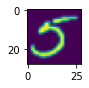

In [88]:
#Poder visualizar las imagenes
elemento=7
plt.figure(figsize=(1,1))
print(y[elemento])
plt.imshow(X_imagenes[elemento]);

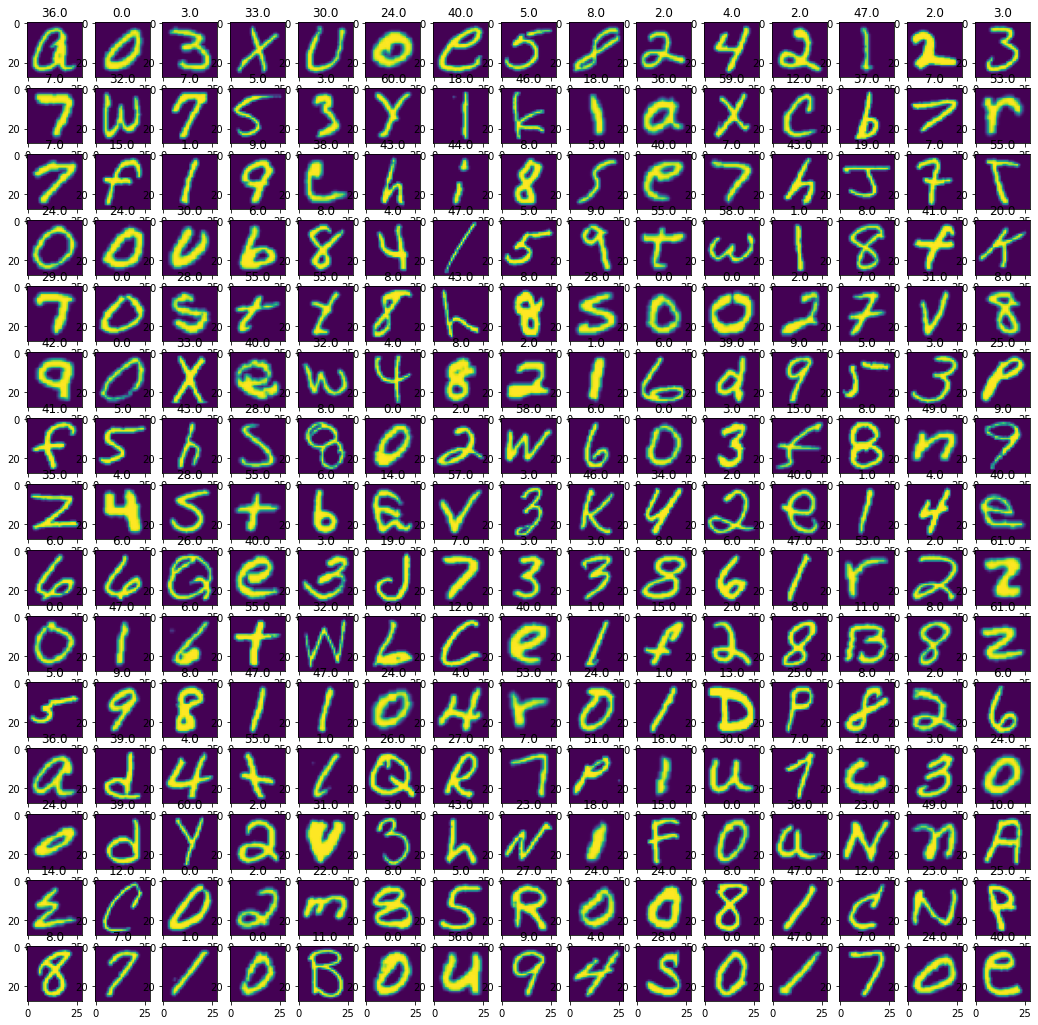

In [13]:
# imprimimos los elementos para poder saber valor tiene cada imagen respecto a la columna 'e'
fig, axes = plt.subplots(15,15, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    ax.set_title(y[i])
    #fig.tight_layout()
    ax.imshow(X_imagenes[i])

In [14]:
# de acuerdo con las observaciones de las imágenes, y valor que tiene de la columna "e" pdemos sacar como conclusión:
# Valor de fila 1-9-> son números 1-9 
# Valor de fila 10-35->son letras A-Z
# Valor de fila 36-61->son letras a-z

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.20)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [62]:
# Your code here
# de acuerdo a la anterior identificación, este caso obtendremos variables para solo las letras mayúsculas (10-35)
y_train_mayus,y_test_mayus=np.where((y_train>=10) & (y_train<=35),1,0),np.where((y_test>=10) & (y_test<=35),1,0)

In [63]:
# LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_mayus)
y_pred_mayus_logistic = logistic_model.predict(X_train)
y_test_pred_mayus_logistic=logistic_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_mayus,y_pred_mayus_logistic))
print("\nEl score de este modelo:\n",logistic_model.score(X_test, y_test_pred_mayus_logistic))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_mayus, y_pred_mayus_logistic))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



La matriz de confusión de este modelo:
 [[15744  1237]
 [ 4452  1831]]

El score de este modelo:
 1.0

El accuracy_score de este modelo:
 0.7554590784044016


In [64]:
# Arbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train_mayus)
y_pred_mayus_tree=tree_model.predict(X_train)
y_test_pred_mayus_tree=tree_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_mayus,y_pred_mayus_tree))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_mayus_tree))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_mayus, y_pred_mayus_tree))


La matriz de confusión de este modelo:
 [[16981     0]
 [    0  6283]]

El score de este modelo:
 1.0

El accuracy_score de este modelo:
 1.0


In [65]:
# LinearDiscriminantAnalysis
linear_model = LinearDiscriminantAnalysis()
linear_model.fit(X_train, y_train_mayus)
y_pred_mayus_linear = linear_model.predict(X_train)
y_test_pred_mayus_linear=linear_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_mayus,y_pred_mayus_linear))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_mayus_linear))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_mayus, y_pred_mayus_linear))


La matriz de confusión de este modelo:
 [[15938  1043]
 [ 4485  1798]]

El score de este modelo:
 0.7299318704463883

El accuracy_score de este modelo:
 0.7623796423658872


In [67]:
# GaussianNB
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train_mayus)
y_pred_mayus_gaussian = gaussian_model.predict(X_train)
y_test_pred_mayus_gaussian=gaussian_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_mayus,y_pred_mayus_gaussian))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_mayus_gaussian))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_mayus, y_pred_mayus_gaussian))


La matriz de confusión de este modelo:
 [[15586  1395]
 [ 4841  1442]]

El score de este modelo:
 0.721829396720325

El accuracy_score de este modelo:
 0.7319463548830811


In [68]:
# RandomForestClassifier
forest_model = RandomForestClassifier(n_jobs=2, random_state=0)
forest_model.fit(X_train, y_train_mayus)
y_pred_mayus_forest = forest_model.predict(X_train)
y_test_pred_mayus_forest=forest_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_mayus,y_pred_mayus_forest))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_mayus_forest))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_mayus, y_pred_mayus_forest))


La matriz de confusión de este modelo:
 [[16981     0]
 [    0  6283]]

El score de este modelo:
 0.7839519439489351

El accuracy_score de este modelo:
 1.0


In [70]:

'''
# SVC
svc_model = SVC()
svc_model.fit(X_train, y_train_mayus)
y_pred_mayus_svc = svc_model.predict(X_train)
y_test_pred_mayus_svc=svc_model.predict(X_test)
'''
#confusion_matrix(y_train_mayus,y_pred_mayus_svc)

'\n# SVC\nsvc_model = SVC()\nsvc_model.fit(X_train, y_train_mayus)\ny_pred_mayus_svc = svc_model.predict(X_train)\ny_test_pred_mayus_svc=svc_model.predict(X_test)\n'

In [69]:
'''
# KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train_mayus)
y_pred_mayus_knn = knn_model.predict(X_train)
y_test_pred_mayus_knn=knn_model.predict(X_test)
'''
#confusion_matrix(y_train_mayus,y_pred_mayus_knn)

'\n# KNeighborsClassifier\nknn_model = KNeighborsClassifier()\nknn_model.fit(X_train, y_train_mayus)\ny_pred_mayus_knn = knn_model.predict(X_train)\ny_test_pred_mayus_knn=knn_model.predict(X_test)\n'

* Try to do the same thing with lowercases.

In [71]:
# Your code here
# de acuerdo a la anterior identificación, este caso obtendremos variables para solo las letras minúsculas (36-61)
y_train_minus,y_test_minus=np.where((y_train>=36) & (y_train<=61),1,0),np.where((y_test>=36) & (y_test<=61),1,0)

In [72]:
# LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_minus)
y_pred_minus_logistic = logistic_model.predict(X_train)
y_test_pred_minus_logistic=logistic_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_minus,y_pred_minus_logistic))
print("\nEl score de este modelo:\n",logistic_model.score(X_test, y_test_pred_minus_logistic))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_minus, y_pred_minus_logistic))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



La matriz de confusión de este modelo:
 [[16819  1003]
 [ 3297  2145]]

El score de este modelo:
 1.0

El accuracy_score de este modelo:
 0.8151650618982118


In [74]:
# Arbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train_minus)
y_pred_minus_tree=tree_model.predict(X_train)
y_test_pred_minus_tree=tree_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_minus,y_pred_minus_tree))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_minus_tree))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_minus, y_pred_minus_tree))


La matriz de confusión de este modelo:
 [[17822     0]
 [    0  5442]]

El score de este modelo:
 1.0

El accuracy_score de este modelo:
 1.0


In [75]:
# LinearDiscriminantAnalysis
linear_model = LinearDiscriminantAnalysis()
linear_model.fit(X_train, y_train_minus)
y_pred_minus_linear = linear_model.predict(X_train)
y_test_pred_minus_linear=linear_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_minus,y_pred_minus_linear))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_minus_linear))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_minus, y_pred_minus_linear))


La matriz de confusión de este modelo:
 [[16875   947]
 [ 3395  2047]]

El score de este modelo:
 0.7766876571600507

El accuracy_score de este modelo:
 0.8133596973865199


In [76]:
# GaussianNB
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train_minus)
y_pred_minus_gaussian = gaussian_model.predict(X_train)
y_test_pred_minus_gaussian=gaussian_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_minus,y_pred_minus_gaussian))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_minus_gaussian))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_minus, y_pred_minus_gaussian))


La matriz de confusión de este modelo:
 [[ 3628 14194]
 [  308  5134]]

El score de este modelo:
 0.36626619957445894

El accuracy_score de este modelo:
 0.3766334250343879


In [77]:
# RandomForestClassifier
forest_model = RandomForestClassifier(n_jobs=2, random_state=0)
forest_model.fit(X_train, y_train_minus)
y_pred_minus_forest = forest_model.predict(X_train)
y_test_pred_minus_forest=forest_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_minus,y_pred_minus_forest))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_minus_forest))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_minus, y_pred_minus_forest))


La matriz de confusión de este modelo:
 [[17822     0]
 [    1  5441]]

El score de este modelo:
 0.8137075802187883

El accuracy_score de este modelo:
 0.999957015130674


* Try to do the same thing with numbers.

In [79]:
# Your code here
# de acuerdo a la anterior identificación, este caso obtendremos variables para solo los números (1-9)
y_train_nums,y_test_nums=np.where((y_train>=1) & (y_train<=9),1,0),np.where((y_test>=1) & (y_test<=9),1,0)

In [80]:
# LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_nums)
y_pred_nums_logistic = logistic_model.predict(X_train)
y_test_pred_nums_logistic=logistic_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_nums,y_pred_nums_logistic))
print("\nEl score de este modelo:\n",logistic_model.score(X_test, y_test_pred_nums_logistic))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_nums, y_pred_nums_logistic))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



La matriz de confusión de este modelo:
 [[9863 3047]
 [2343 8011]]

El score de este modelo:
 1.0

El accuracy_score de este modelo:
 0.7683115543328748


In [81]:
# Arbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train_nums)
y_pred_nums_tree=tree_model.predict(X_train)
y_test_pred_nums_tree=tree_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_nums,y_pred_nums_tree))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_nums_tree))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_nums, y_pred_nums_tree))


La matriz de confusión de este modelo:
 [[12910     0]
 [    0 10354]]

El score de este modelo:
 1.0

El accuracy_score de este modelo:
 1.0


In [82]:
# LinearDiscriminantAnalysis
linear_model = LinearDiscriminantAnalysis()
linear_model.fit(X_train, y_train_nums)
y_pred_nums_linear = linear_model.predict(X_train)
y_test_pred_nums_linear=linear_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_nums,y_pred_nums_linear))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_nums_linear))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_nums, y_pred_nums_linear))


La matriz de confusión de este modelo:
 [[9979 2931]
 [2359 7995]]

El score de este modelo:
 0.734466676696254

El accuracy_score de este modelo:
 0.7726100412654745


In [83]:
# GaussianNB
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train_nums)
y_pred_nums_gaussian = gaussian_model.predict(X_train)
y_test_pred_nums_gaussian=gaussian_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_nums,y_pred_nums_gaussian))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_nums_gaussian))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_nums, y_pred_nums_gaussian))


La matriz de confusión de este modelo:
 [[3917 8993]
 [ 804 9550]]

El score de este modelo:
 0.5683229813664596

El accuracy_score de este modelo:
 0.578877235213205


In [84]:
# RandomForestClassifier
forest_model = RandomForestClassifier(n_jobs=2, random_state=0)
forest_model.fit(X_train, y_train_nums)
y_pred_nums_forest = forest_model.predict(X_train)
y_test_pred_nums_forest=forest_model.predict(X_test)

print("\nLa matriz de confusión de este modelo:\n",confusion_matrix(y_train_nums,y_pred_nums_forest))
print("\nEl score de este modelo:\n",tree_model.score(X_test, y_test_pred_nums_forest))
print("\nEl accuracy_score de este modelo:\n",accuracy_score(y_train_nums, y_pred_nums_forest))


La matriz de confusión de este modelo:
 [[12910     0]
 [    0 10354]]

El score de este modelo:
 0.8127511874314943

El accuracy_score de este modelo:
 1.0
